# **Final Project** <br>
# **by Tamara Cousineau**
**Brain tumor predictions using deep learning - CNN** <br>
Advanced Machine Learning <br>
Spring 2022 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Unzip the folder and extract its contents into the /tmp  (under file w/ arrow)folder using the code below.
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

In [ ]:
#Data into test/train folders 
#Source: https://www.kaggle.com/code/salikhussaini49/brain-tumor-prediction-97/notebook

train_dir = pathlib.Path('/tmp/train/')
test_dir = pathlib.Path('/tmp/test/')

image_count_train = len(list(train_dir.glob('*/*.jpg')))
image_count_test = len(list(test_dir.glob('*/*.jpg')))
print("Train Image Count: {} \n Test Image Count: {}".format(image_count_train,image_count_test))

Train Image Count: 2100 
 Test Image Count: 900


In [ ]:
#will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 (no) and 1 (yes)
#https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
#Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=None,
    seed=123,
    image_size=(img_height, img_width),
    batch_size= batch_size,
    labels='inferred')


Found 2100 files belonging to 2 classes.


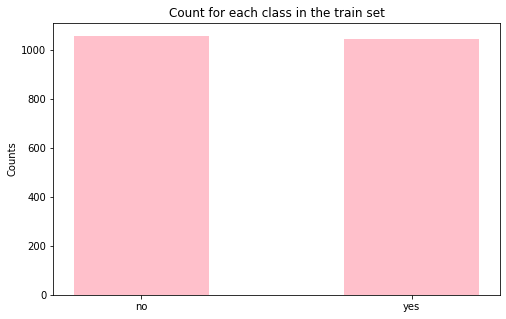

In [ ]:
#Bar graph with number of yes and no in train dir

list_yes_no = []
dir_path_no = r'/tmp/train/no/'
list_yes_no.append(len([entry for entry in os.listdir(dir_path_no) if os.path.isfile(os.path.join(dir_path_no, entry))]))
dir_path_yes = r'/tmp/train/yes/'
list_yes_no.append(len([entry for entry in os.listdir(dir_path_yes) if os.path.isfile(os.path.join(dir_path_yes, entry))]))

fig_train = plt.figure(figsize = (8,5))
plt.bar(train_ds.class_names, list_yes_no, color = 'pink', width = 0.5)
plt.ylabel('Counts')
plt.title('Count for each class in the train set')
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred')

Found 900 files belonging to 2 classes.


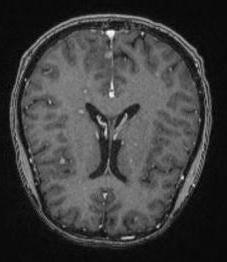

In [ ]:
#Looking at an image with no tumor
im = Image.open('/tmp/test/no/no5.jpg')
im

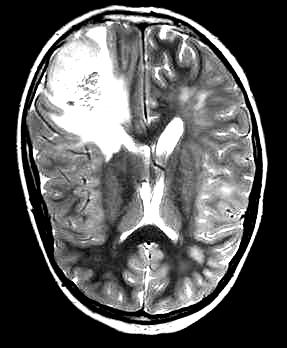

In [ ]:
#Looking at an image with a tumor
im = Image.open('/tmp/test/yes/y0.jpg')
im

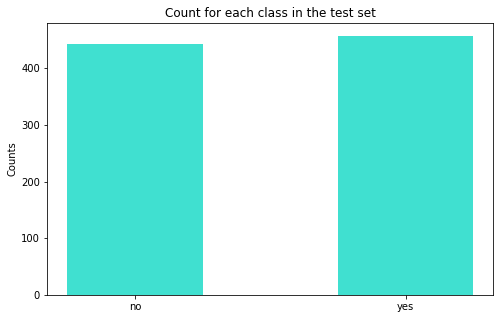

In [ ]:
#Bar graph with number of yes and no in test dir
list_yes_no = []
dir_path_no = r'/tmp/test/no/'
list_yes_no.append(len([entry for entry in os.listdir(dir_path_no) if os.path.isfile(os.path.join(dir_path_no, entry))]))
dir_path_yes = r'/tmp/test/yes/'
list_yes_no.append(len([entry for entry in os.listdir(dir_path_yes) if os.path.isfile(os.path.join(dir_path_yes, entry))]))

fig_train = plt.figure(figsize = (8,5))
plt.bar(train_ds.class_names, list_yes_no, color = 'turquoise', width = 0.5)
plt.ylabel('Counts')
plt.title('Count for each class in the test set')
plt.show()

In [ ]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


In [ ]:
#Prefecher to optimize time 
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Model build
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, padding = 'same',activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding = 'same',activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding ='same'),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding ='same'),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding = 'same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

hist = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


66/66 [==============================] - 270s 4s/step - loss: 0.5422 - accuracy: 0.7133 - val_loss: 0.4744 - val_accuracy: 0.7922
Epoch 2/10
66/66 [==============================] - 263s 4s/step - loss: 0.4075 - accuracy: 0.8224 - val_loss: 0.4165 - val_accuracy: 0.8022
Epoch 3/10
66/66 [==============================] - 263s 4s/step - loss: 0.2956 - accuracy: 0.8710 - val_loss: 0.3454 - val_accuracy: 0.8400
Epoch 4/10
66/66 [==============================] - 262s 4s/step - loss: 0.2135 - accuracy: 0.9167 - val_loss: 0.2654 - val_accuracy: 0.8622
Epoch 5/10
66/66 [==============================] - 262s 4s/step - loss: 0.1486 - accuracy: 0.9414 - val_loss: 0.1850 - val_accuracy: 0.9089
Epoch 6/10
66/66 [==============================] - 262s 4s/step - loss: 0.1147 - accuracy: 0.9557 - val_loss: 0.1396 - val_accuracy: 0.9556
Epoch 7/10
66/66 [==============================] - 262s 4s/step - loss: 0.0726 - accuracy: 0.9748 - val_loss: 0.2050 - val_accuracy: 0.9167
Epoch 8/10
66/66 [======

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        9248      
                                                        

In [ ]:
print(hist.history['loss'][9])
print(hist.history['accuracy'][9])

0.05472838133573532
0.9828571677207947



Accuracy on the final epoch of training was 98.29%


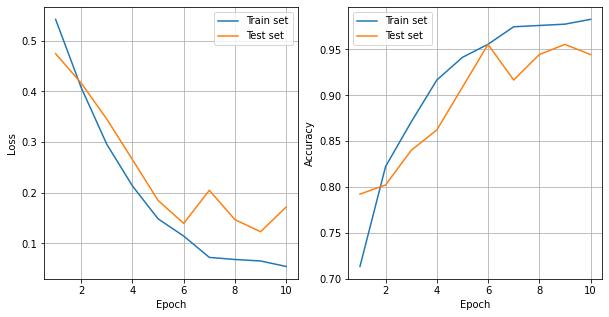

In [ ]:
# Accuracy visualization 

#Plot loss during training
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 11), hist.history['loss'], label='Train set')
plt.plot(np.arange(1, 11), hist.history['val_loss'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

#Plot accuracy during training
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 11), hist.history['accuracy'], label='Train set')
plt.plot(np.arange(1, 11), hist.history['val_accuracy'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
print(f"\nAccuracy on the final epoch of training was {100*hist.history['accuracy'][-1]:0.2f}%")

In [ ]:
#Assessing the model's performance on the test set 
train_acc = model.evaluate(train_ds)
test_acc = model.evaluate(test_ds)

29/29 [==============================] - 33s 1s/step - loss: 0.1720 - accuracy: 0.9444


In [ ]:
print(f"\nThe model achieves an accuracy of {train_acc[1]*100:.2f}% on the test data.")
print(f"\nThe model achieves an accuracy of {test_acc[1]*100:.2f}% on the test data.")


The model achieves an accuracy of 98.29% on the test data.

The model achieves an accuracy of 94.44% on the test data.


In [ ]:
#FROM :https://www.kaggle.com/code/salikhussaini49/brain-tumor-prediction-97/notebook
#This function takes in a path to an image and returns its prediction value and accuracy
def process(img1):
  img = tf.keras.preprocessing.image.load_img(
      img1, target_size=(img_height, img_width)
  )
  #Convert the image to numpy array
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  #Put the array in 2D
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)

  pred = class_names[np.argmax(score)]


  return pred

The image as an actual label of "no" and prediction "no"


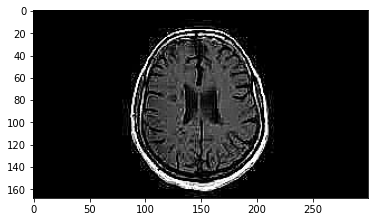

The image as an actual label of "no" and prediction "no"


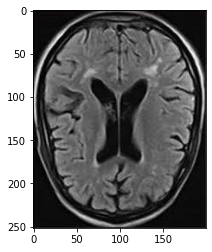

The image as an actual label of "no" and prediction "yes"


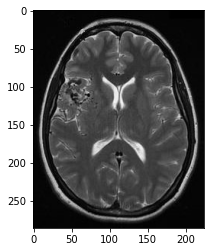

In [ ]:
#Demonstration of prediction on a sample from the test folder 
paths = ['/tmp/test/no/no122.jpg','/tmp/test/no/no715.jpg','/tmp/test/no/no457.jpg']
for path in paths: 
  pred,value = process(path)
  im = imageio.imread(path)
  actual = path.split('/')[3]
  print(f'The image as an actual label of "{actual}" and prediction "{pred}"')
  plt.imshow(im)
  plt.show()


The image as an actual label of "yes" and prediction "yes"


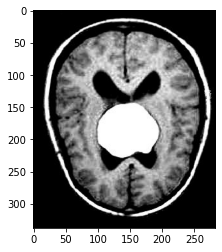

The image as an actual label of "yes" and prediction "yes"


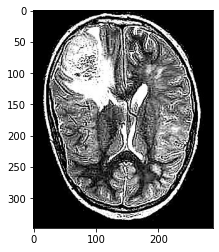

The image as an actual label of "yes" and prediction "yes"


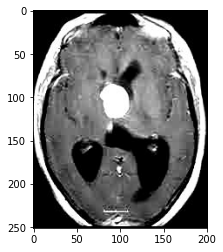

In [ ]:
#Demo #2 
paths = ['/tmp/test/yes/y15.jpg','/tmp/test/yes/y35.jpg','/tmp/test/yes/y51.jpg']
for path in paths: 
  pred,value = process(path)
  im = imageio.imread(path)
  actual = path.split('/')[3]
  print(f'The image as an actual label of "{actual}" and prediction "{pred}"')
  plt.imshow(im)
  plt.show()
